<a href="https://colab.research.google.com/github/JamesAttwood1910/Diplomado_USACH/blob/main/Clustering_Modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tarea 1 

In [ ]:
# Instalar librarias
import numpy as np # Números
import pandas as pd # Dataframe
import matplotlib.pyplot as plt # visualización
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime

# comando mágico para habilitar el ploteo de gráficos en el Notebook actual.
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform



In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# unir colab con google drive 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Modulo4/OnlineRetail.csv", encoding= 'unicode_escape')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.info() # valores faltantes en Description, Customer ID. 
            # hay que convertir invoiceNo a un int64, y InvoiceDate a un DateTime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Primera parte 

# pregunta 1

# Graficar la cantidad de ordenes (Invoice) por cada día de la semana. ¿Qué
# día se producen la mayor cantidad de ordenes y cuando la menor?

In [ ]:
# crear nueva variable para dia de la semana. 

data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')
data['InvoiceDate_Day'] = data['InvoiceDate'].dt.day_name()

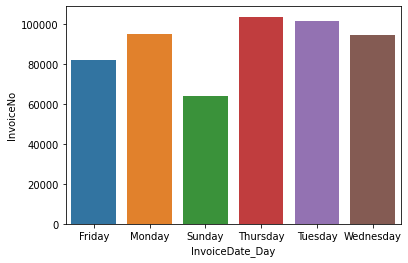

In [ ]:
grafico1 = data.groupby(by = 'InvoiceDate_Day').count().reset_index()

sns.barplot(x = 'InvoiceDate_Day', y = 'InvoiceNo', data = grafico1)

# Dia con mayor cantidad de ordenes es Thursday!

# Dia con menor cantidad es Sunday! 

In [ ]:
# Pregunta 2

# ¿Cuales son los 5 países que más gastan en promedio? graficar y tabla

In [ ]:
# Crear nueva variable 'total spend' (gasto total)

data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.groupby(by = 'Country').sum().astype('int64').reset_index().sort_values(by = 'TotalSpend', ascending = False)[['Country', 'TotalSpend']].

,Country,TotalSpend
36,United Kingdom,8187806
24,Netherlands,284661
10,EIRE,263276
14,Germany,221698
13,France,197403
0,Australia,137077
33,Switzerland,56385
31,Spain,54774
3,Belgium,40910
32,Sweden,36595


In [ ]:
# Graficar 5 paises con mas venta total y agrupar los otros paises en grupo 'other'. 

n = 5 

df_sorted = data.groupby(by = 'Country').sum().astype('int64').reset_index().sort_values(by = 'TotalSpend', ascending = False, ignore_index=True)

df_sorted.loc[df_sorted.index >= n, 'Country'] = 'Others'

grafico2 = df_sorted.groupby('Country').sum().sort_values(by = 'TotalSpend', ascending = False).reset_index()

grafico2

# los 5 paises que gastan mas son UK, Netherlands, EIRE (ireland), Germany, France

,Country,Quantity,UnitPrice,CustomerID,TotalSpend
0,United Kingdom,4263829,2245715,5626432595,8187806
1,Others,341928,117436,220737032,592885
2,Netherlands,200128,6492,34190538,284661
3,EIRE,142637,48447,110391745,263276
4,Germany,117448,37666,120075093,221698
5,France,110480,43031,107648864,197403


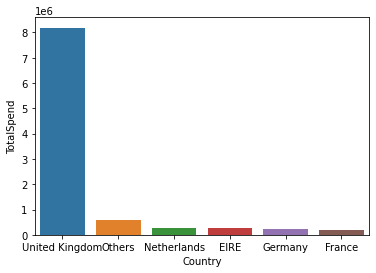

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

sns.barplot(data = grafico2, x = 'Country', y = 'TotalSpend')


In [ ]:
# como varia venta total para estos 5 paises con agegacion por dia de la semana? 
grafico3 = data[data['Country'].isin(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'])].groupby(by = ['Country', 'InvoiceDate_Day']).sum().astype('int64').reset_index()[['Country', 'InvoiceDate_Day', 'TotalSpend']].sort_values(by = ['Country','TotalSpend'], ascending = False)
grafico3


,Country,InvoiceDate_Day,TotalSpend
27,United Kingdom,Thursday,1720142
28,United Kingdom,Tuesday,1683364
29,United Kingdom,Wednesday,1436952
25,United Kingdom,Monday,1364079
24,United Kingdom,Friday,1276033
26,United Kingdom,Sunday,707234
21,Netherlands,Thursday,95030
22,Netherlands,Tuesday,71588
23,Netherlands,Wednesday,44584
19,Netherlands,Monday,34803


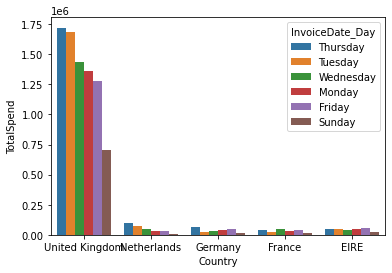

In [ ]:
sns.barplot(x = 'Country', y = 'TotalSpend', hue = 'InvoiceDate_Day', data = grafico3)

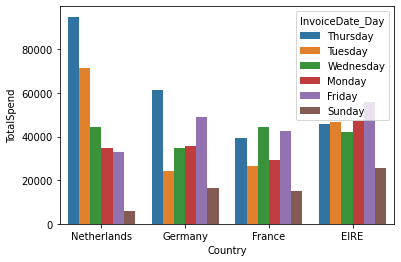

In [ ]:
# remover reino unido para ver los otros paises bien
# idealmente sabria como hacer estos graficos con un for loop pero necesito aprender como hacerlo.
# Thursday es el dia con mas total spend en 3 de los 5 paises.   

sns.barplot(x = 'Country', y = 'TotalSpend', hue = 'InvoiceDate_Day', data = grafico3[grafico3['Country'] != 'United Kingdom'])

In [ ]:
# pregunta 3 

# Hay items que la empresa entrega de regalo, ¿Cuantos se regalaron?. indicar cantidad por mes.

In [ ]:
# Identificar InvoiveNo con UnitPrice de $0

data[data['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_Day,TotalSpend,InvoiceDate_Month
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,nan,United Kingdom,Wednesday,0.00,December
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,nan,United Kingdom,Wednesday,0.00,December
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,nan,United Kingdom,Wednesday,0.00,December
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,nan,United Kingdom,Wednesday,0.00,December
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,nan,United Kingdom,Wednesday,0.00,December
...,...,...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.00,nan,United Kingdom,Thursday,0.00,December
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,nan,United Kingdom,Thursday,0.00,December
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.00,nan,United Kingdom,Thursday,0.00,December
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.00,nan,United Kingdom,Thursday,0.00,December


In [ ]:
# crear nueva variable para mes. 

data['InvoiceDate_Month'] = data['InvoiceDate'].dt.month_name()

In [ ]:
# agrupar por mes y sumar cantidad de InvoiceNo con un valor de $0

data[data['UnitPrice'] == 0].groupby(by = 'InvoiceDate_Month').sum() 

# Los valores negativos podrian indicar productos devueltos a la tienda? 

,Quantity,UnitPrice,CustomerID,TotalSpend
InvoiceDate_Month,,,,
April,-6072,0.00,26867.00,0.00
August,-3227,0.00,89076.00,0.00
December,-5303,0.00,44118.00,0.00
February,-2695,0.00,17560.00,0.00
January,1026,0.00,41269.00,0.00
July,-4615,0.00,29325.00,0.00
June,-40228,0.00,0.00,0.00
March,-20259,0.00,26352.00,0.00
May,-9479,0.00,30082.00,0.00


In [ ]:
# filtrar Quantity para solo tener cantidades positivos (sugeriendo que no son productos devueltos a la tienda)

data.loc[(data['UnitPrice'] == 0) & (data['Quantity'] >= 0)].groupby(by = 'InvoiceDate_Month').sum().sort_values(by="Quantity", ascending = False)

# November es el mes con mas regalos. 

,Quantity,UnitPrice,CustomerID,TotalSpend
InvoiceDate_Month,,,,
November,17091,0.00,188850.00,0.00
January,9931,0.00,41269.00,0.00
March,7424,0.00,26352.00,0.00
July,5780,0.00,29325.00,0.00
October,5344,0.00,46309.00,0.00
June,5124,0.00,0.00,0.00
September,4596,0.00,28881.00,0.00
December,3881,0.00,44118.00,0.00
May,3687,0.00,30082.00,0.00


In [ ]:
# Parte 2 - cluster jerárquico

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Modulo4/SegmentationData.csv")

In [ ]:
data2.head()

,ID,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA,Choice
0,1,10,20,35,5,20,10,MBA,Lexus
1,2,25,5,25,5,25,15,MBA,BMW
2,3,10,20,30,10,10,20,MBA,Lexus
3,4,10,15,30,10,20,15,MBA,BMW
4,5,20,10,40,1,14,15,MBA,Mercedes


In [ ]:
# Obtener la solución de cluster jerárquico para k = 4 y con ella:
# Poner nombre a los 4 clusters
# Realizar crosstab (con MBA y Choice)
# Calcular el test de chi-cuadrado (pearson) para los crosstab
# (MBA y Choice) con el fin de responder si existe relación entre
# las variables. ( alfa = 0.05) (no incorporar corrección de Yates)

In [ ]:
# Elegir variables numericos

new_data2 = data2[['Trendy', 'Styling', 'Reliability', 'Sportiness', 'Performance', 'Comfort']]

In [ ]:
#estandarizar las viariables, promedio = 0 y desviacion estandard = 1
scaler = StandardScaler()
new_scaled = scaler.fit_transform(new_data2)
new_scaled

array([[-0.689164  ,  0.49914295,  1.77794095, -1.17173478,  0.08604462,
        -1.11484105],
       [ 1.44861102, -1.9300194 ,  0.35792247, -1.17173478,  0.83381334,
        -0.08467147],
       [-0.689164  ,  0.49914295,  1.06793171, -0.18401378, -1.40949283,
         0.94549811],
       [-0.689164  , -0.31057784,  1.06793171, -0.18401378,  0.08604462,
        -0.08467147],
       [ 0.73601934, -1.12029862,  2.48795019, -1.96191159, -0.81127785,
        -0.08467147],
       [ 0.73601934,  2.11858452, -1.77210526,  1.79142824, -1.40949283,
        -1.11484105],
       [-0.689164  , -0.63446615, -0.35208677,  1.19879563,  0.83381334,
        -0.08467147],
       [ 0.02342767, -1.12029862,  1.77794095, -0.18401378,  0.83381334,
        -2.14501063],
       [-1.97182901, -0.63446615,  0.35792247, -1.96191159,  2.32935079,
         1.97566769],
       [ 0.02342767,  0.49914295, -0.35208677, -0.18401378,  0.83381334,
        -1.11484105],
       [-1.40175567,  0.49914295,  0.35792247, -1.

In [ ]:
new_scaled = pd.DataFrame(new_scaled, columns = new_data2.columns)

In [ ]:
new_scaled.head()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
0,-0.69,0.50,1.78,-1.17,0.09,-1.11
1,1.45,-1.93,0.36,-1.17,0.83,-0.08
2,-0.69,0.50,1.07,-0.18,-1.41,0.95
3,-0.69,-0.31,1.07,-0.18,0.09,-0.08
4,0.74,-1.12,2.49,-1.96,-0.81,-0.08


In [ ]:
data_dist = pdist(new_scaled) #distancia euclediana
data_dist

array([3.75603137, 2.82158388, 1.78790465, ..., 2.81839803, 3.56030937,
       3.80538542])

In [ ]:
link = linkage(new_scaled, 'ward')

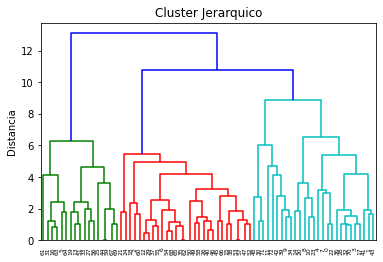

In [ ]:
#construimos el dendograma
dendrogram = dendrogram(link)
plt.title('Cluster Jerarquico')
plt.ylabel('Distancia')
plt.show()

In [ ]:
labels = fcluster(link, 8, criterion='distance') # cambie el valor de 10 a 8 para tener 4 clusters no 3. 
print(labels)

[4 4 2 4 4 1 2 4 4 3 4 3 2 1 4 2 1 4 2 1 4 2 4 4 2 1 2 1 4 2 3 1 4 1 3 2 4
 2 2 3 2 4 3 4 1 2 2 2 3 2 2 1 2 2 2 2 1 2 2 1 2 1 2 1 1 2 2 1 2 1 4 3 3]


In [ ]:
#agregar el cluster a nuestra tabla
new_scaled['Cluster'] = labels

In [ ]:
new_scaled.head(20)

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,Cluster
0,-0.69,0.50,1.78,-1.17,0.09,-1.11,4
1,1.45,-1.93,0.36,-1.17,0.83,-0.08,4
2,-0.69,0.50,1.07,-0.18,-1.41,0.95,2
3,-0.69,-0.31,1.07,-0.18,0.09,-0.08,4
4,0.74,-1.12,2.49,-1.96,-0.81,-0.08,4
5,0.74,2.12,-1.77,1.79,-1.41,-1.11,1
6,-0.69,-0.63,-0.35,1.20,0.83,-0.08,2
7,0.02,-1.12,1.78,-0.18,0.83,-2.15,4
8,-1.97,-0.63,0.36,-1.96,2.33,1.98,4
9,0.02,0.50,-0.35,-0.18,0.83,-1.11,3


In [ ]:
# poner nobre a los 4 clusters

group_cluster = new_scaled.groupby(['Cluster']).mean()
print(group_cluster)

         Trendy  Styling  Reliability  Sportiness  Performance  Comfort
Cluster                                                                
1          1.16     0.86        -0.66        0.16        -0.93    -0.70
2         -0.02    -0.43        -0.28        0.50        -0.10     0.59
3         -1.12     1.13        -0.05       -0.03         0.75    -0.75
4         -0.51    -0.69         1.11       -0.95         0.66     0.09


In [ ]:
cluster ={1: 'Estilo', 2: 'Deportivo', 3: 'Clásico antiguo', 4: 'Buen rendimiento'}

In [ ]:
new_data2 = new_scaled.replace({"Cluster" : cluster})

In [ ]:
new_data2.head()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,Cluster
0,-0.69,0.50,1.78,-1.17,0.09,-1.11,Buen rendimiento
1,1.45,-1.93,0.36,-1.17,0.83,-0.08,Buen rendimiento
2,-0.69,0.50,1.07,-0.18,-1.41,0.95,Deportivo
3,-0.69,-0.31,1.07,-0.18,0.09,-0.08,Buen rendimiento
4,0.74,-1.12,2.49,-1.96,-0.81,-0.08,Buen rendimiento


In [ ]:
# Realizar crosstab (con MBA y Choice)

In [ ]:
# MBA 

pd.crosstab(data2.MBA, new_data2.Cluster, margins=True, normalize='columns')

Cluster,Buen rendimiento,Clásico antiguo,Deportivo,Estilo,All
MBA,,,,,
MBA,0.67,0.22,0.21,0.24,0.33
Undergrad,0.33,0.78,0.79,0.76,0.67


In [ ]:
pd.crosstab(data2.MBA, new_data2.Cluster, margins=True, normalize='index')

Cluster,Buen rendimiento,Clásico antiguo,Deportivo,Estilo
MBA,,,,
MBA,0.50,0.08,0.25,0.17
Undergrad,0.12,0.14,0.47,0.27
All,0.25,0.12,0.40,0.23


In [ ]:
pd.crosstab(data2.MBA, new_data2.Cluster, margins=True, normalize='all') # mas informativo para mi!

Cluster,Buen rendimiento,Clásico antiguo,Deportivo,Estilo,All
MBA,,,,,
MBA,0.16,0.03,0.08,0.05,0.33
Undergrad,0.08,0.10,0.32,0.18,0.67
All,0.25,0.12,0.40,0.23,1.00


In [ ]:
# Choice 

pd.crosstab(data2.Choice, new_data2.Cluster, margins=True, normalize='all')

Cluster,Buen rendimiento,Clásico antiguo,Deportivo,Estilo,All
Choice,,,,,
BMW,0.11,0.08,0.14,0.11,0.44
Lexus,0.12,0.00,0.11,0.07,0.30
Mercedes,0.01,0.04,0.15,0.05,0.26
All,0.25,0.12,0.40,0.23,1.00


In [ ]:
# Calcular el test de chi-cuadrado (pearson) para los crosstab
# (MBA y Choice) con el fin de responder si existe relación entre
# las variables. ( alfa = 0.05) (no incorporar corrección de Yates)

In [ ]:
pd.crosstab(data2.MBA, new_data2.Cluster, margins=True)

Cluster,Buen rendimiento,Clásico antiguo,Deportivo,Estilo,All
MBA,,,,,
MBA,12,2,6,4,24
Undergrad,6,7,23,13,49
All,18,9,29,17,73


In [ ]:
import numpy as np
from scipy import stats

In [ ]:
# MBA

In [ ]:
tabla = pd.crosstab(data2.MBA, new_data2.Cluster, margins=True)

In [ ]:
f_obs = np.array([tabla.iloc[0][0:4].values,
                  tabla.iloc[1][0:4].values])
f_obs

array([[12,  2,  6,  4],
       [ 6,  7, 23, 13]])

In [ ]:
#en este caso p-value = 0.006 (< 0.05). Implica que existe una relación entre MBA y los cluster
stats.chi2_contingency(f_obs)[0:4]

(12.400751871629879,
 0.006129163115297634,
 3,
 array([[ 5.91780822,  2.95890411,  9.53424658,  5.5890411 ],
        [12.08219178,  6.04109589, 19.46575342, 11.4109589 ]]))

In [ ]:
# Choice

In [ ]:
tabla2 = pd.crosstab(data2.Choice, new_data2.Cluster, margins=True)

In [ ]:
f_obs2 = np.array([tabla2.iloc[0][0:4].values,
                  tabla2.iloc[1][0:4].values])
f_obs2

array([[ 8,  6, 10,  8],
       [ 9,  0,  8,  5]])

In [ ]:
# En este caso p-value = 0.15, (> 0.05). Implica que no existe una relación entre Choice y los cluster

stats.chi2_contingency(f_obs2)[0:4]

(5.303373097490745,
 0.15088366560407673,
 3,
 array([[10.07407407,  3.55555556, 10.66666667,  7.7037037 ],
        [ 6.92592593,  2.44444444,  7.33333333,  5.2962963 ]]))